In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


In [3]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [37]:
def plot_predictions(X_train = X_train,
                     y_train = y_train,
                     X_test = X_test,
                     y_test = y_test,
                     pred = None):
    plt.scatter(X_train, y_train, c="blue", s=14)
    plt.scatter(X_test, y_test, c="green", s=14)

    if pred is not None:
        plt.scatter(X_test, pred, c="red", r=14)

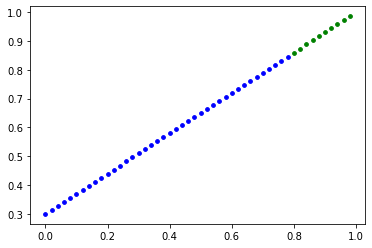

In [111]:
plot_predictions(X_train, y_train, X_test, y_test)

In [88]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [107]:
model0=LinearRegressionModel()

In [108]:
model0.state_dict()

OrderedDict([('weights', tensor([0.2257])), ('bias', tensor([1.4868]))])

In [112]:
with torch.inference_mode():
    pred=model0(X_test)

In [113]:
print(pred)

tensor([[1.6674],
        [1.6719],
        [1.6764],
        [1.6809],
        [1.6854],
        [1.6900],
        [1.6945],
        [1.6990],
        [1.7035],
        [1.7080]])


In [110]:
len(X_test), len(model0), len(pred)

TypeError: object of type 'LinearRegressionModel' has no len()

In [70]:
list(model0.parameters())

[Parameter containing:
 tensor([0.5237], requires_grad=True),
 Parameter containing:
 tensor([-0.5784], requires_grad=True)]

ValueError: x and y must be the same size

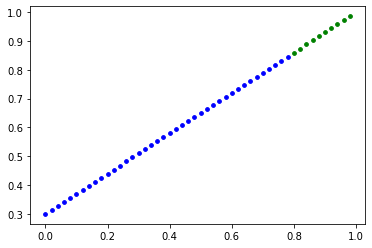

In [38]:
plot_predictions(X_train, y_train, X_test, y_test, pred)